In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from prettytable import PrettyTable
from sklearn import metrics, tree, svm
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from termcolor import colored

pd.set_option('display.max_columns', None)

## Dataset understanding

In [2]:
df = pd.read_csv("./dataset/CTU-13.csv")
df.iloc[0]

Flow Duration        9.011435e+06
Tot Fwd Pkts         5.000000e+00
Tot Bwd Pkts         1.000000e+00
TotLen Fwd Pkts      0.000000e+00
TotLen Bwd Pkts      0.000000e+00
Fwd Pkt Len Max      0.000000e+00
Fwd Pkt Len Min      0.000000e+00
Fwd Pkt Len Mean     0.000000e+00
Fwd Pkt Len Std      0.000000e+00
Bwd Pkt Len Max      0.000000e+00
Bwd Pkt Len Min      0.000000e+00
Bwd Pkt Len Mean     0.000000e+00
Bwd Pkt Len Std      0.000000e+00
Flow Byts/s          0.000000e+00
Flow Pkts/s          6.658207e-01
Flow IAT Mean        1.802287e+06
Flow IAT Std         2.686479e+06
Flow IAT Max         6.006895e+06
Flow IAT Min         6.000000e+00
Fwd IAT Tot          9.011429e+06
Fwd IAT Mean         2.252857e+06
Fwd IAT Std          2.875669e+06
Fwd IAT Max          6.006895e+06
Fwd IAT Min          1.100000e+01
Bwd IAT Tot          0.000000e+00
Bwd IAT Mean         0.000000e+00
Bwd IAT Std          0.000000e+00
Bwd IAT Max          0.000000e+00
Bwd IAT Min          0.000000e+00
Bwd PSH Flags 

In [3]:
df.describe(include="all")

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,9.221200e+04,92212.000000,92212.000000,9.221200e+04,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,9.221200e+04,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,92212.000000,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,9.221200e+04,92212.000000
mean,1.070781e+07,10.943370,12.974233,5.600684e+03,1.021176e+04,77.677287,6.762699,22.974344,25.156811,221.865007,22.481749,99.433759,89.968386,1.138193e+05,2.648651e+04,1.225057e+06,1.699203e+06,5.367063e+06,3.965147e+05,9.401086e+06,1.430546e+06,1.658805e+06,4.536767e+06,3.934057e+05,7.604188e+06,8.657605e+05,1.201935e+06,3.161932e+06,1.070292e+05,0.021277,177.271331,224.765757,13102.720324,1.338379e+04,22.072171,235.485761,76.414598,81.657083,3.107399e+04,0.041556,0.317789,0.011853,0.210851,0.538531,94.179421,22.974344,99.433759,29989.415673,5.779454,4.351079e+05,7.777843e+04,5.598308e+05,3.854448e+05,3.928015e+06,4.906831e+05,4.354137e+06,3.542860e+06,0.421832
std,2.708038e+07,249.027375,188.163610,2.857600e+05,2.096956e+05,227.595074,33.400015,76.539275,81.240567,501.244678,37.663492,196.265739,180.314414,1.720914e+06,9.508670e+04,5.116283e+06,4.854940e+06,1.456884e+07,4.564766e+06,2.537665e+07,4.965779e+06,5.251308e+06,1.328856e+07,3.920732e+06,2.484887e+07,3.818965e+06,5.305884e+06,1.204175e+07,1.724857e+06,0.144307,3888.225818,3736.272499,47206.537896,4.864089e+04,32.892671,510.389706,129.526008,156.225411,1.272904e+05,0.199574,0.465620,0.108225,0.407915,0.925399,136.840824,76.539275,196.265739,32067.342713,204.037943,1.516574e+06,7.175262e+05,1.983055e+06,1.416148e+06,1.200553e+07,3.847780e+06,1.334522e+07,1.143824e+07,0.493855
min,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.694919e-02,1.000000e+00,0.000000e+00,1.000000e+00,-3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,8.333333e-03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.182200e+04,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.547067e+00,1.958575e+04,0.000000e+00,2.159675e+04,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,16.000000,0.000000,7.766812e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.00

### Datatypes understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92212 entries, 0 to 92211
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow Duration      92212 non-null  int64  
 1   Tot Fwd Pkts       92212 non-null  int64  
 2   Tot Bwd Pkts       92212 non-null  int64  
 3   TotLen Fwd Pkts    92212 non-null  int64  
 4   TotLen Bwd Pkts    92212 non-null  int64  
 5   Fwd Pkt Len Max    92212 non-null  int64  
 6   Fwd Pkt Len Min    92212 non-null  int64  
 7   Fwd Pkt Len Mean   92212 non-null  float64
 8   Fwd Pkt Len Std    92212 non-null  float64
 9   Bwd Pkt Len Max    92212 non-null  int64  
 10  Bwd Pkt Len Min    92212 non-null  int64  
 11  Bwd Pkt Len Mean   92212 non-null  float64
 12  Bwd Pkt Len Std    92212 non-null  float64
 13  Flow Byts/s        92212 non-null  float64
 14  Flow Pkts/s        92212 non-null  float64
 15  Flow IAT Mean      92212 non-null  float64
 16  Flow IAT Std       922

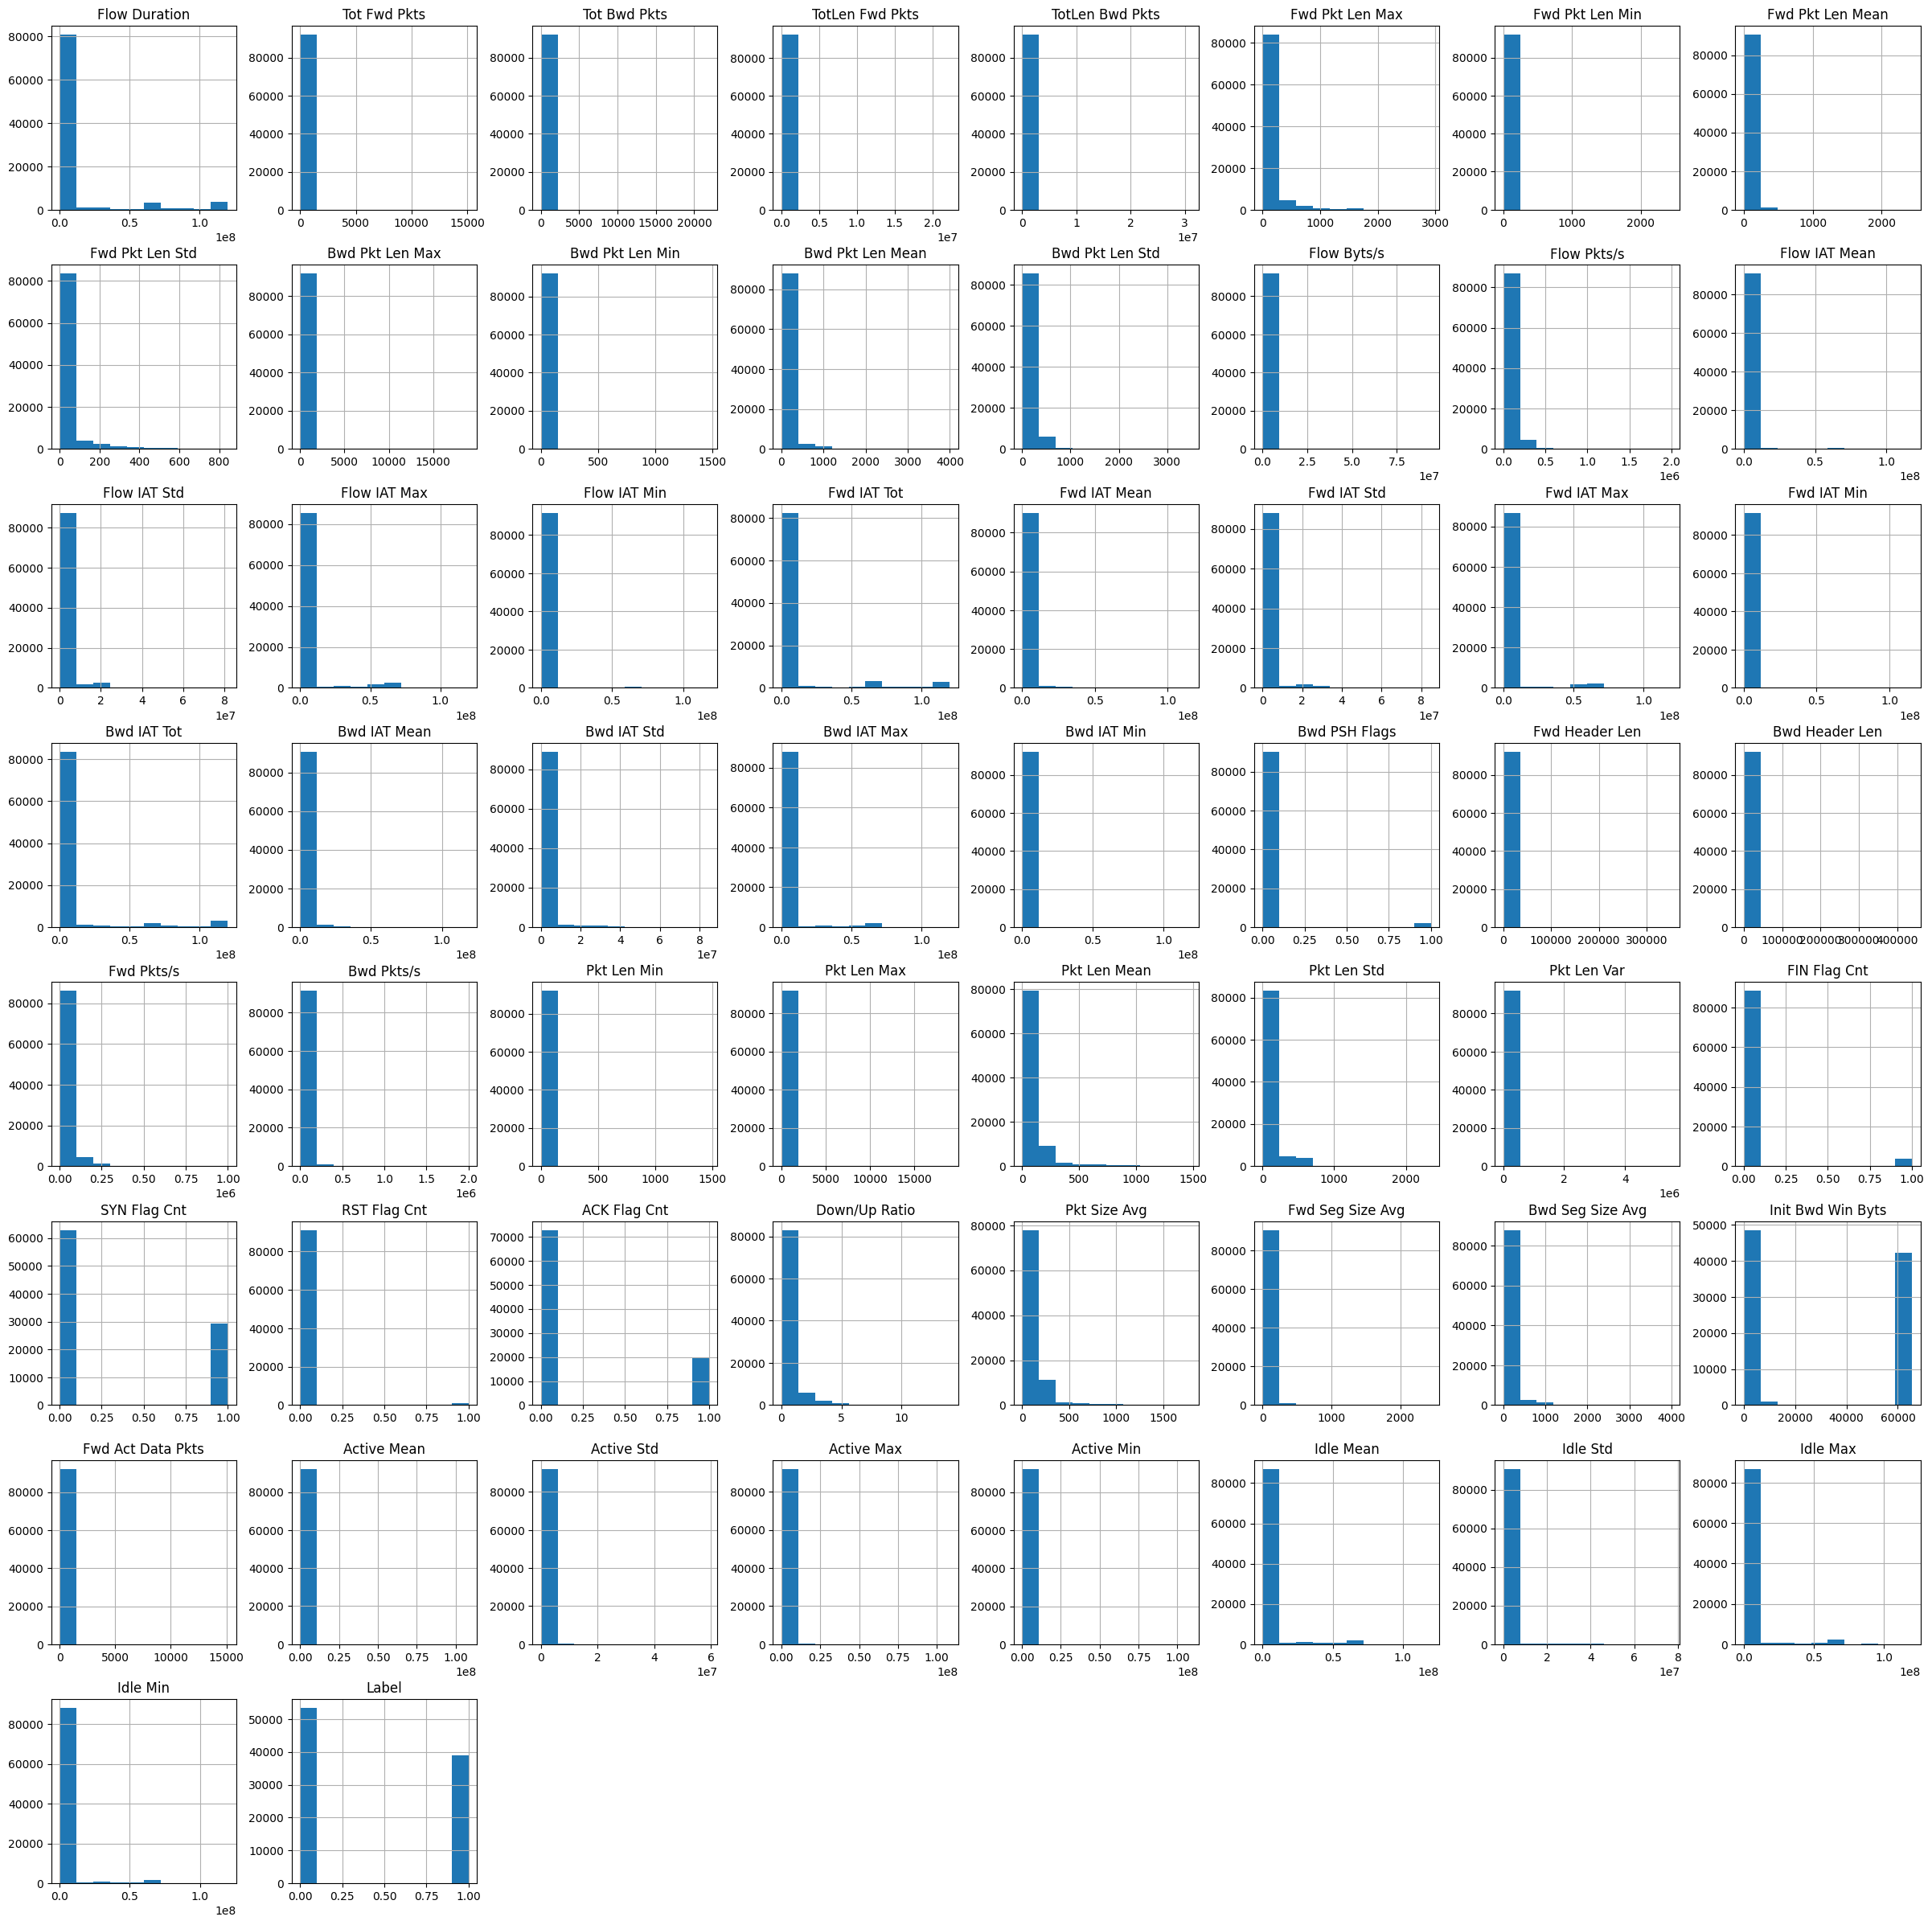

In [5]:
df.hist(figsize=(30,30));

In [6]:
for i, col_name in enumerate(df.columns):  
    print("{0:16}".format(col_name), " \tnunique = {0:6}".format(df[col_name].nunique()), 
        ", {0:5}% of ".format(round( (100*df[col_name].nunique() /len(df[col_name]) ), 2) )  ,
        "total = {0:9}".format(len(df[col_name])), "\tnull = {}".format(df[col_name].isnull().sum()) ,
        ",\t {}% of total".format(round( (100*(df[col_name].isnull().sum()) /len(df[col_name]) ), 2) ) )

Flow Duration     	nunique =  66387 , 71.99% of  total =     92212 	null = 0 ,	 0.0% of total
Tot Fwd Pkts      	nunique =    436 ,  0.47% of  total =     92212 	null = 0 ,	 0.0% of total
Tot Bwd Pkts      	nunique =    714 ,  0.77% of  total =     92212 	null = 0 ,	 0.0% of total
TotLen Fwd Pkts   	nunique =   3942 ,  4.27% of  total =     92212 	null = 0 ,	 0.0% of total
TotLen Bwd Pkts   	nunique =   6451 ,   7.0% of  total =     92212 	null = 0 ,	 0.0% of total
Fwd Pkt Len Max   	nunique =   1203 ,   1.3% of  total =     92212 	null = 0 ,	 0.0% of total
Fwd Pkt Len Min   	nunique =    129 ,  0.14% of  total =     92212 	null = 0 ,	 0.0% of total
Fwd Pkt Len Mean  	nunique =   6930 ,  7.52% of  total =     92212 	null = 0 ,	 0.0% of total
Fwd Pkt Len Std   	nunique =   8131 ,  8.82% of  total =     92212 	null = 0 ,	 0.0% of total
Bwd Pkt Len Max   	nunique =   1168 ,  1.27% of  total =     92212 	null = 0 ,	 0.0% of total
Bwd Pkt Len Min   	nunique =    130 ,  0.14% of  total =    

### Classes description

In [7]:
df.Label.value_counts()

0    53314
1    38898
Name: Label, dtype: int64

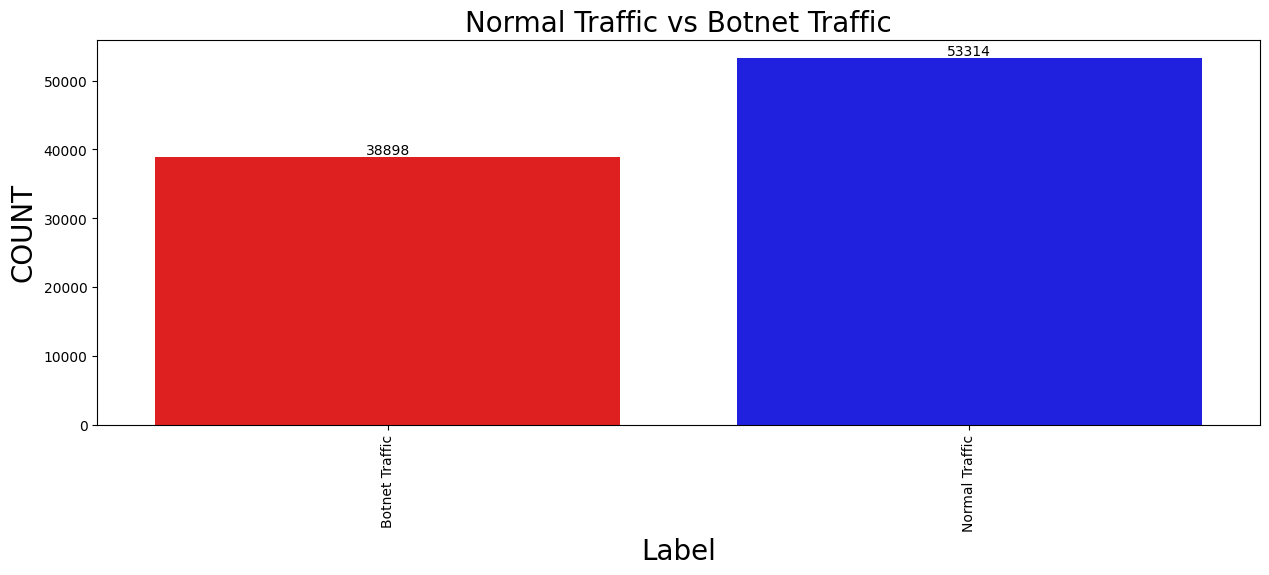

In [8]:
df_to_plot = df.copy() 
df_to_plot['Label'].replace([0, 1], ['Normal Traffic', 'Botnet Traffic'], inplace=True)
plt.figure(figsize = (15,5))
ax = sns.countplot(x="Label", data=df_to_plot, palette=["#FF0000","#0000FF"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Normal Traffic vs Botnet Traffic", fontsize=20)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Label", fontsize = 20)
plt.ylabel('COUNT', fontsize = 20);

In [9]:
# Look at some features for normal traffic

normal_df = df[df['Label'] == 0]
normal_df.describe()


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,5.331400e+04,53314.000000,53314.000000,5.331400e+04,5.331400e+04,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,5.331400e+04,53314.000000,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,53314.000000,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,5.331400e+04,53314.0
mean,1.183955e+07,8.998049,15.738624,5.184460e+03,1.175429e+04,88.015512,1.682954,18.315041,29.274102,260.323198,24.560303,111.027642,111.656817,7.331441e+03,370.124703,7.851891e+05,1.404864e+06,4.661144e+06,1.338390e+05,1.070050e+07,1.165268e+06,1.348256e+06,3.897543e+06,2.814305e+05,1.120063e+07,1.064623e+06,1.560921e+06,4.262027e+06,7.200713e+04,0.032543,189.407510,307.377274,126.940802,243.183901,24.461492,272.971002,86.624056,99.413556,33973.981039,0.013824,0.158964,0.018794,0.230033,0.479930,109.966460,18.315041,111.027642,22533.517932,5.365908,1.568118e+05,9.385848e+04,3.289065e+05,1.031014e+05,3.841496e+06,6.106216e+05,4.346262e+06,3.350085e+06,0.0
std,3.065518e+07,191.328376,233.664390,2.391167e+05,2.514014e+05,243.945402,12.427593,60.287267,82.711110,421.400484,23.094990,165.709169,172.516154,6.809005e+04,3326.808660,3.272066e+06,4.736714e+06,1.424134e+07,2.199474e+06,2.949688e+07,3.821770e+06,4.976667e+06,1.281768e+07,2.292200e+06,3.024896e+07,3.894384e+06,5.907718e+06,1.393013e+07,9.838717e+05,0.177439,4649.415508,4834.874009,1447.642622,2197.984350,22.209104,429.764652,120.430572,155.213974,90186.445541,0.116760,0.365646,0.135799,0.420858,0.773909,124.159611,60.287267,165.709169,31027.713812,181.658470,1.003680e+06,6.088809e+05,1.630029e+06,8.872057e+05,1.274905e+07,4.317842e+06,1.428394e+07,1.204194e+07,0.0
min,1.300000e+01,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.016949,1.300000e+01,0.000000e+00,1.300000e+01,-3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.008334,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,2.432650e+04,0.000000,2.000000,0.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,26.000000,11.313709,5.675620e+01,8.888362,2.297150e+04,0.000000e+00,2.425725e+04,7.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.885525e+04,1.866325e+04,0.000000e+00,1.884300e+04,1.170000e+02,0.000000,0.000000,16.000000,0.000000,6.281325,0.000000,46.000000,30.275000,9.237604,85.333333,0.000000,0.000000,0.000000,0.000000,0.000000,35.833333,0.000000,26.000000,-

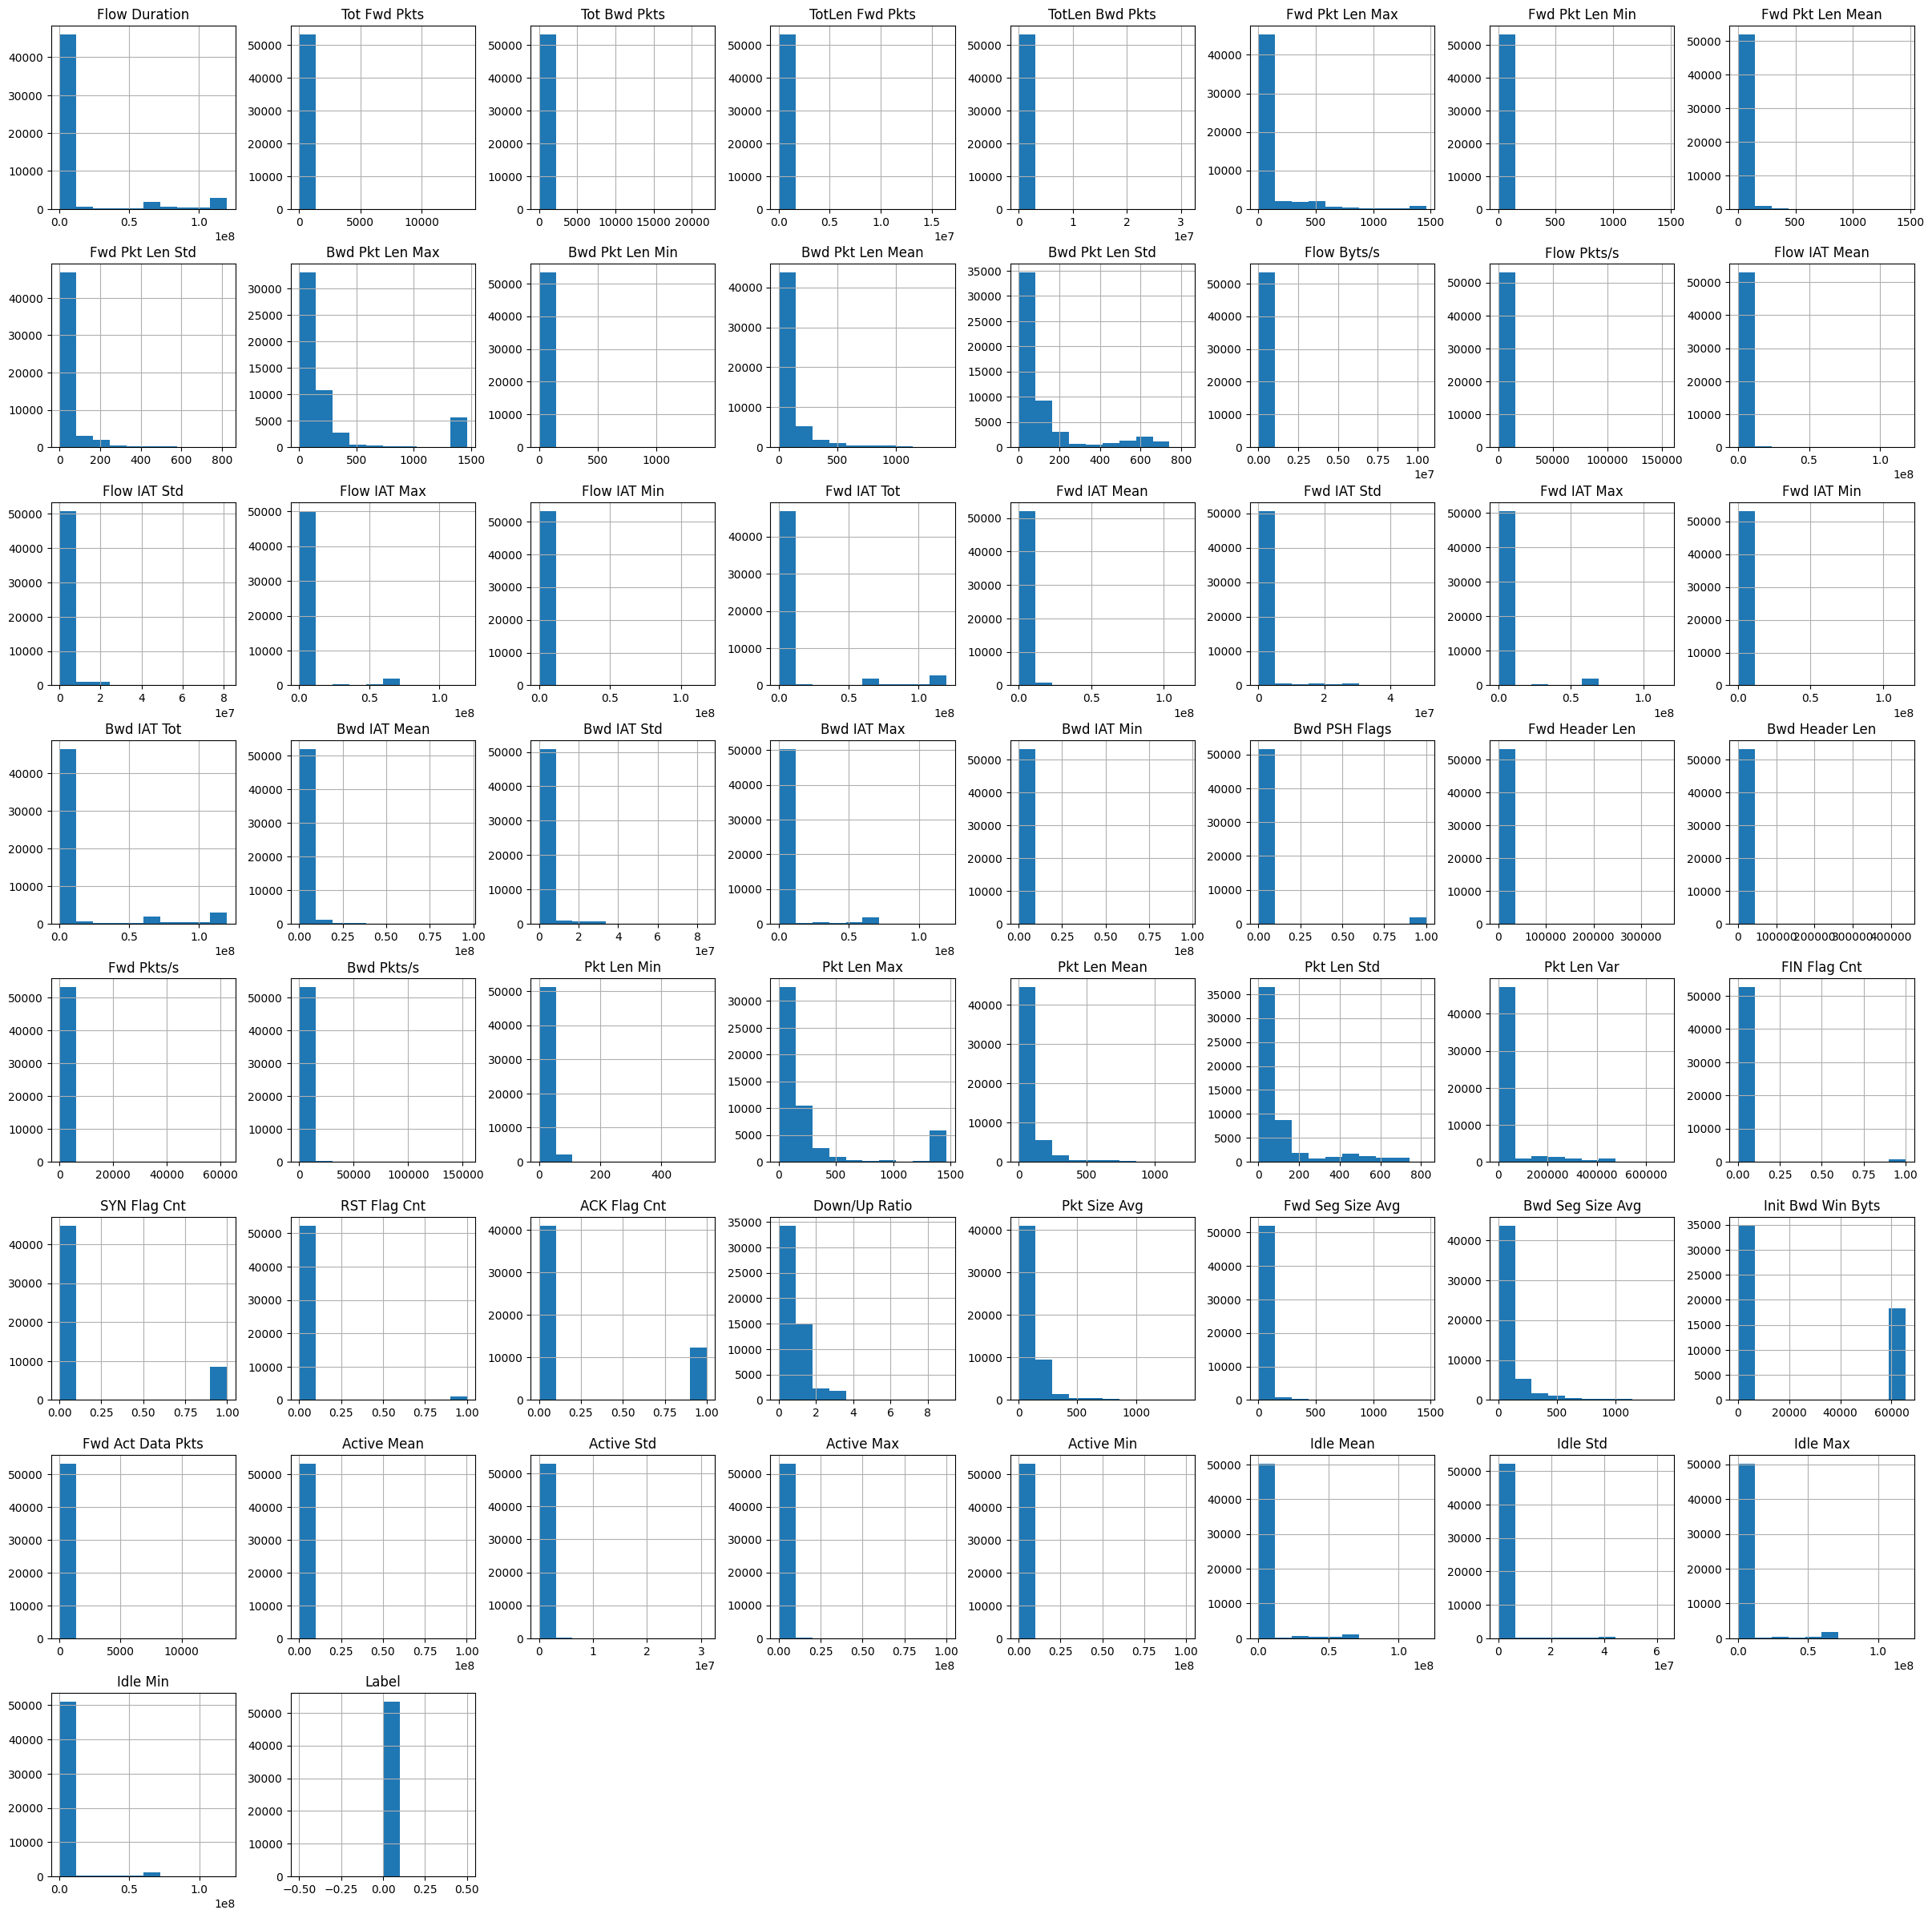

In [10]:
normal_df.hist(figsize=(30,30));

In [11]:
# Look at some features for botnet traffic

botnet_df = df[df['Label'] == 1]
botnet_df.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,3.889800e+04,38898.000000,38898.000000,3.889800e+04,3.889800e+04,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.00000,38898.000000,38898.000000,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,38898.000000,38898.000000,38898.000000,38898.000000,3.889800e+04,38898.000000,38898.000000,38898.000000,38898.000000,3.889800e+04,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,38898.000000,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,3.889800e+04,38898.0
mean,9.156633e+06,13.609646,9.185331,6.171164e+03,8.097564e+03,63.507610,13.725050,29.360432,19.513610,169.153813,19.63286,83.543063,60.241999,2.597726e+05,6.228190e+04,1.827943e+06,2.102628e+06,6.334602e+06,7.565408e+05,7.620100e+06,1.794139e+06,2.084447e+06,5.412893e+06,5.468801e+05,2.674869e+06,5.931972e+05,7.099045e+05,1.654129e+06,1.550308e+05,0.005836,160.637359,111.537560,30887.457571,3.139444e+04,18.797342,184.108103,62.421409,57.319879,2.709924e+04,0.079567,0.535477,0.002339,0.184560,0.618849,72.541543,29.360432,83.543063,40208.546018,6.346265,8.165433e+05,5.573895e+04,8.763379e+05,7.724277e+05,4.046599e+06,3.262941e+05,4.364930e+06,3.807079e+06,1.0
std,2.112623e+07,311.173197,95.260839,3.394345e+05,1.326952e+05,202.203633,48.467214,93.998555,78.833138,589.421365,51.16400,230.747700,186.432076,2.641509e+06,1.385740e+05,6.837526e+06,4.984356e+06,1.495224e+07,6.522463e+06,1.812784e+07,6.181409e+06,5.577965e+06,1.386045e+07,5.403671e+06,1.294795e+07,3.695814e+06,4.299357e+06,8.593804e+06,2.392119e+06,0.076170,2492.162608,1015.767329,68796.279377,7.100075e+04,43.246587,599.859684,139.838450,154.318775,1.650327e+05,0.270625,0.498746,0.048312,0.387945,1.094561,149.841771,93.998555,230.747700,30620.569289,231.220137,1.954508e+06,8.435249e+05,2.346825e+06,1.848346e+06,1.090345e+07,3.081905e+06,1.193946e+07,1.054928e+07,0.0
min,1.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,1.736288e-02,1.000000e+00,0.000000e+00,1.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,8.333333e-03,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,2.950000e+02,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,6.657411e-01,1.585000e+02,0.000000e+00,2.780000e+02,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.000000,24.000000,0.272058,1.109885e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

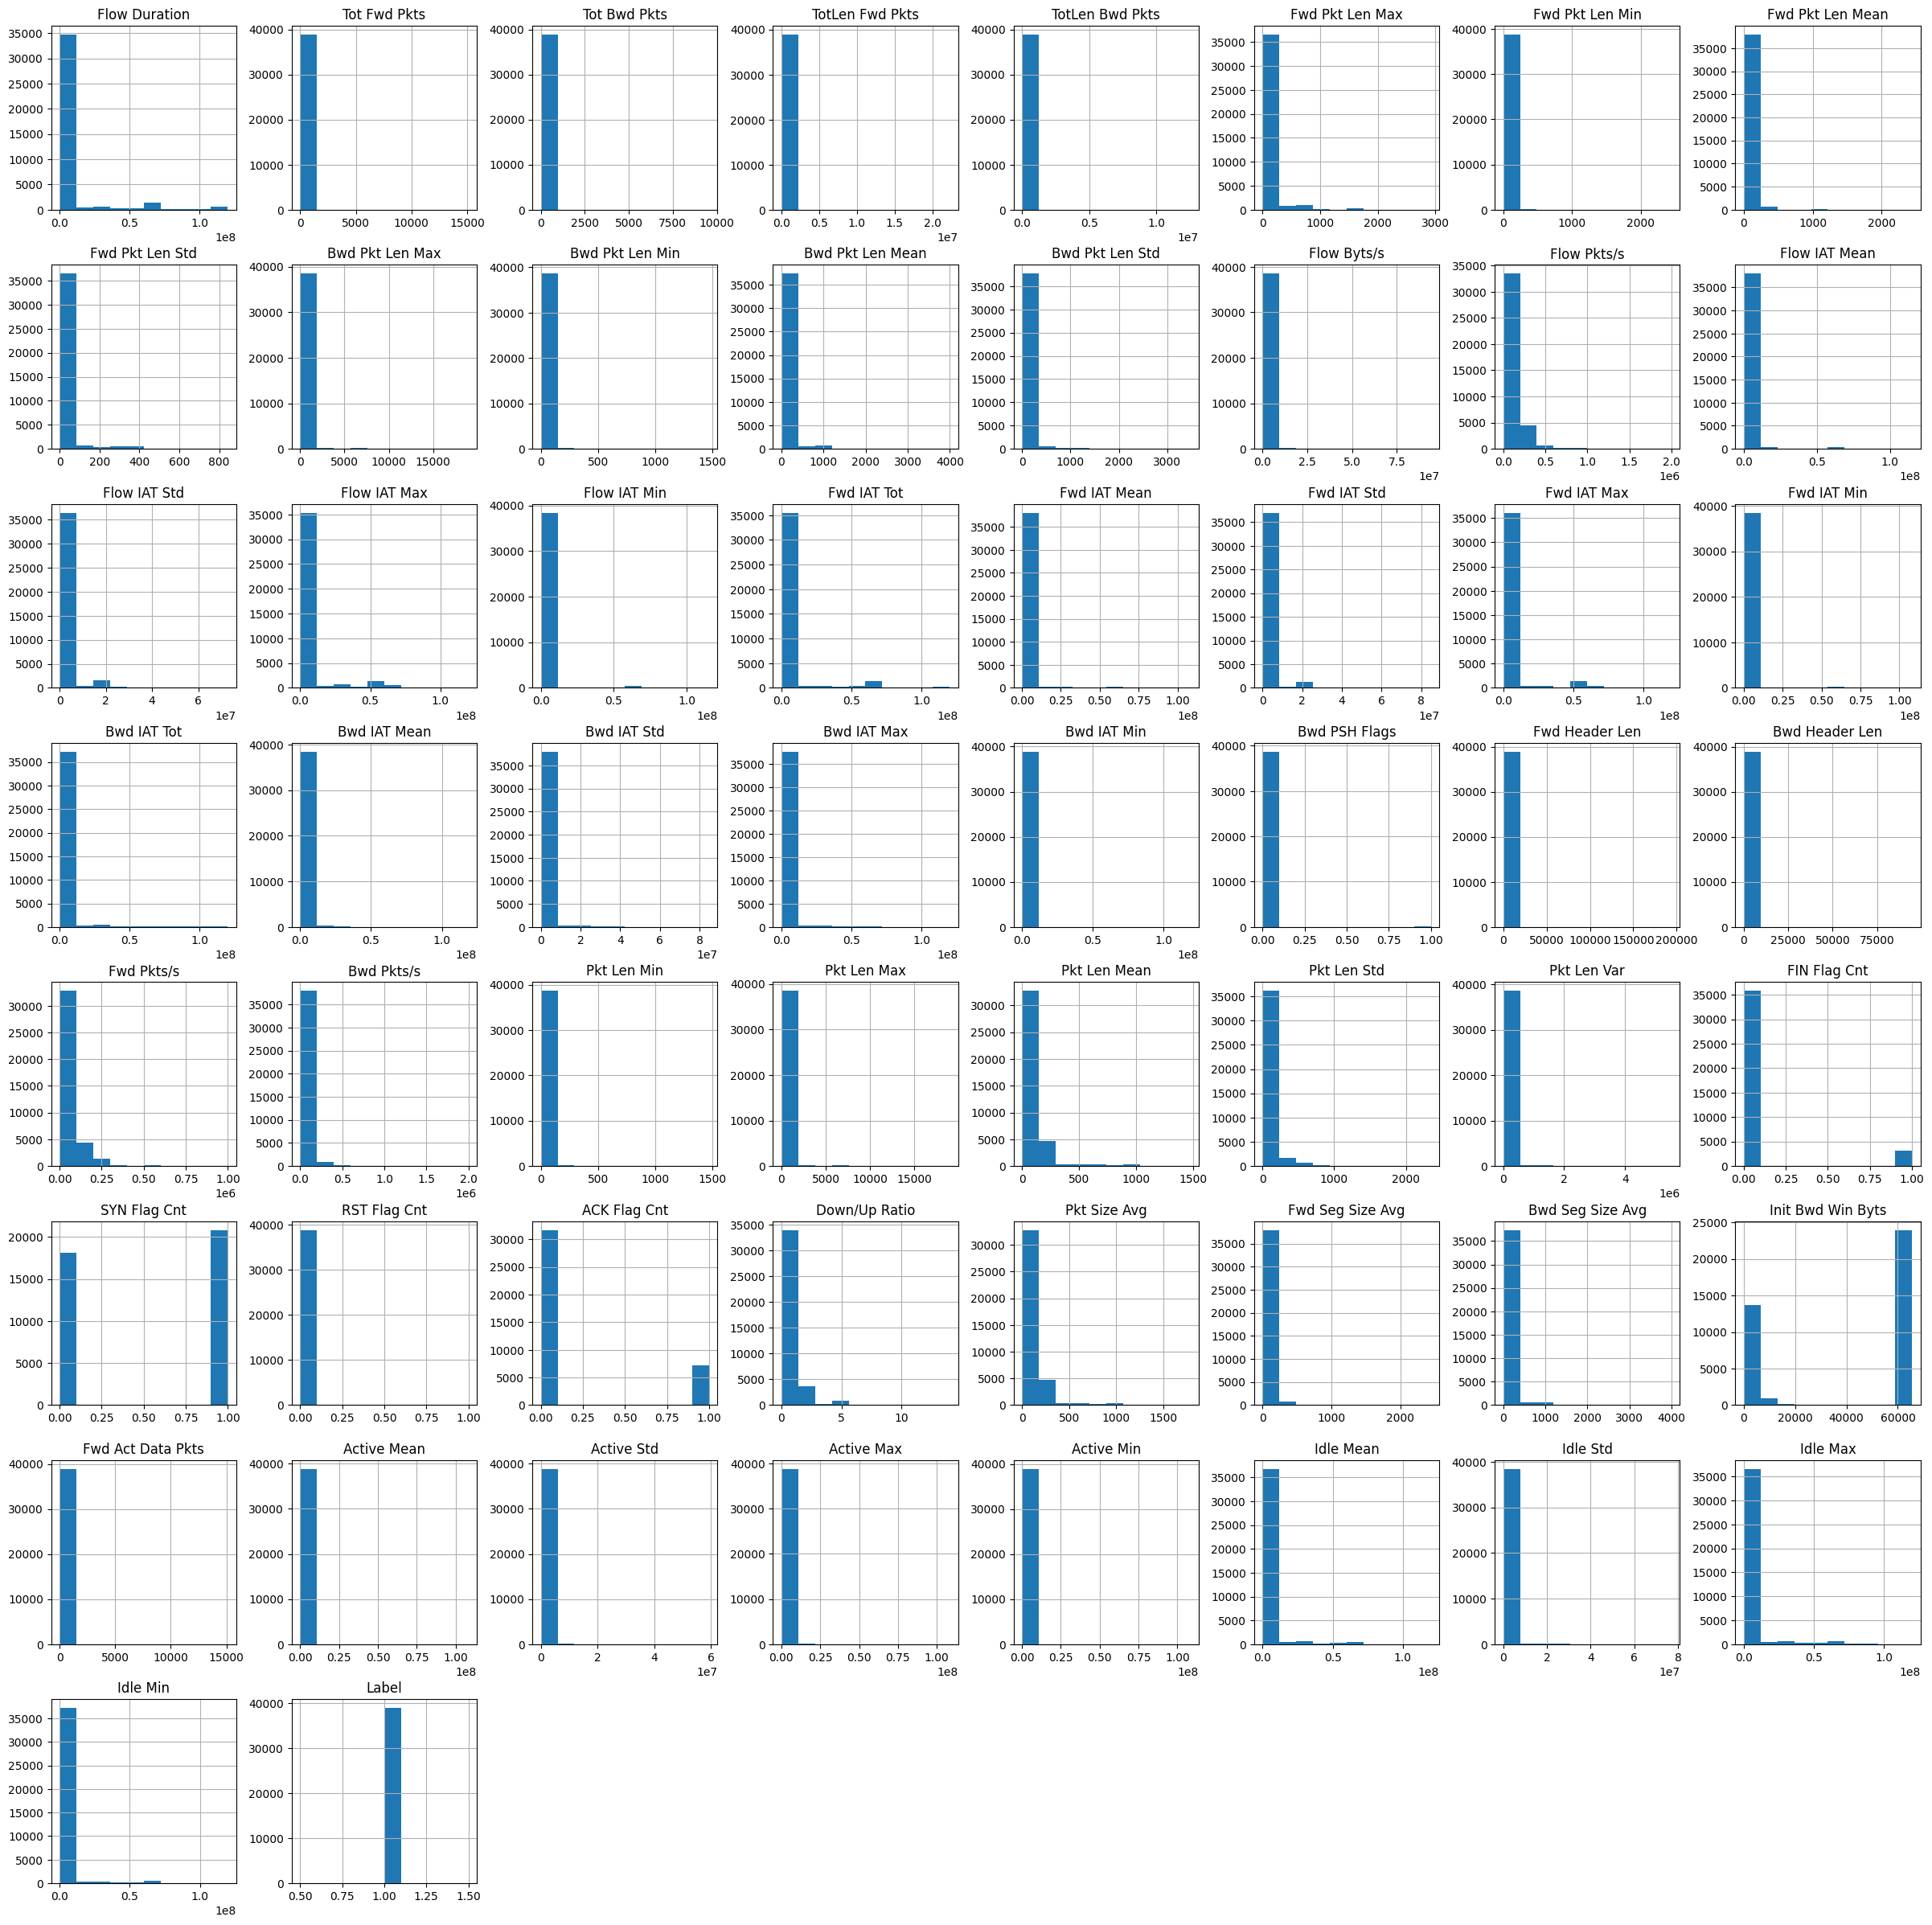

In [12]:
botnet_df.hist(figsize=(30,30));

## Preprocessing & Data Cleaning

In [13]:
print(df.isnull().sum())

Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Bwd PSH Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
RST Flag Cnt         0
ACK Flag Cnt         0
Down/Up Rat

In [14]:
col_names = np.array(df.columns)

binary_idx = [29, 39, 40, 41, 42, 57]
numeric_idx = list(set(range(57)).difference(binary_idx))

binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

print(f"binary_cols  = {binary_cols}\n")
print(f"numeric_cols = {numeric_cols}\n")

binary_cols  = ['Bwd PSH Flags', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'Label']

numeric_cols = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']



In [15]:
df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bwd PSH Flags,92212.0,0.021277,0.144307,0.0,0.0,0.0,0.0,1.0
FIN Flag Cnt,92212.0,0.041556,0.199574,0.0,0.0,0.0,0.0,1.0
SYN Flag Cnt,92212.0,0.317789,0.465620,0.0,0.0,0.0,1.0,1.0
RST Flag Cnt,92212.0,0.011853,0.108225,0.0,0.0,0.0,0.0,1.0
ACK Flag Cnt,92212.0,0.210851,0.407915,0.0,0.0,0.0,0.0,1.0
Label,92212.0,0.421832,0.493855,0.0,0.0,0.0,1.0,1.0


### Data transformation

In [16]:
min_max_scaler = MinMaxScaler().fit(df[numeric_cols])
df[numeric_cols] = min_max_scaler.transform(df[numeric_cols])

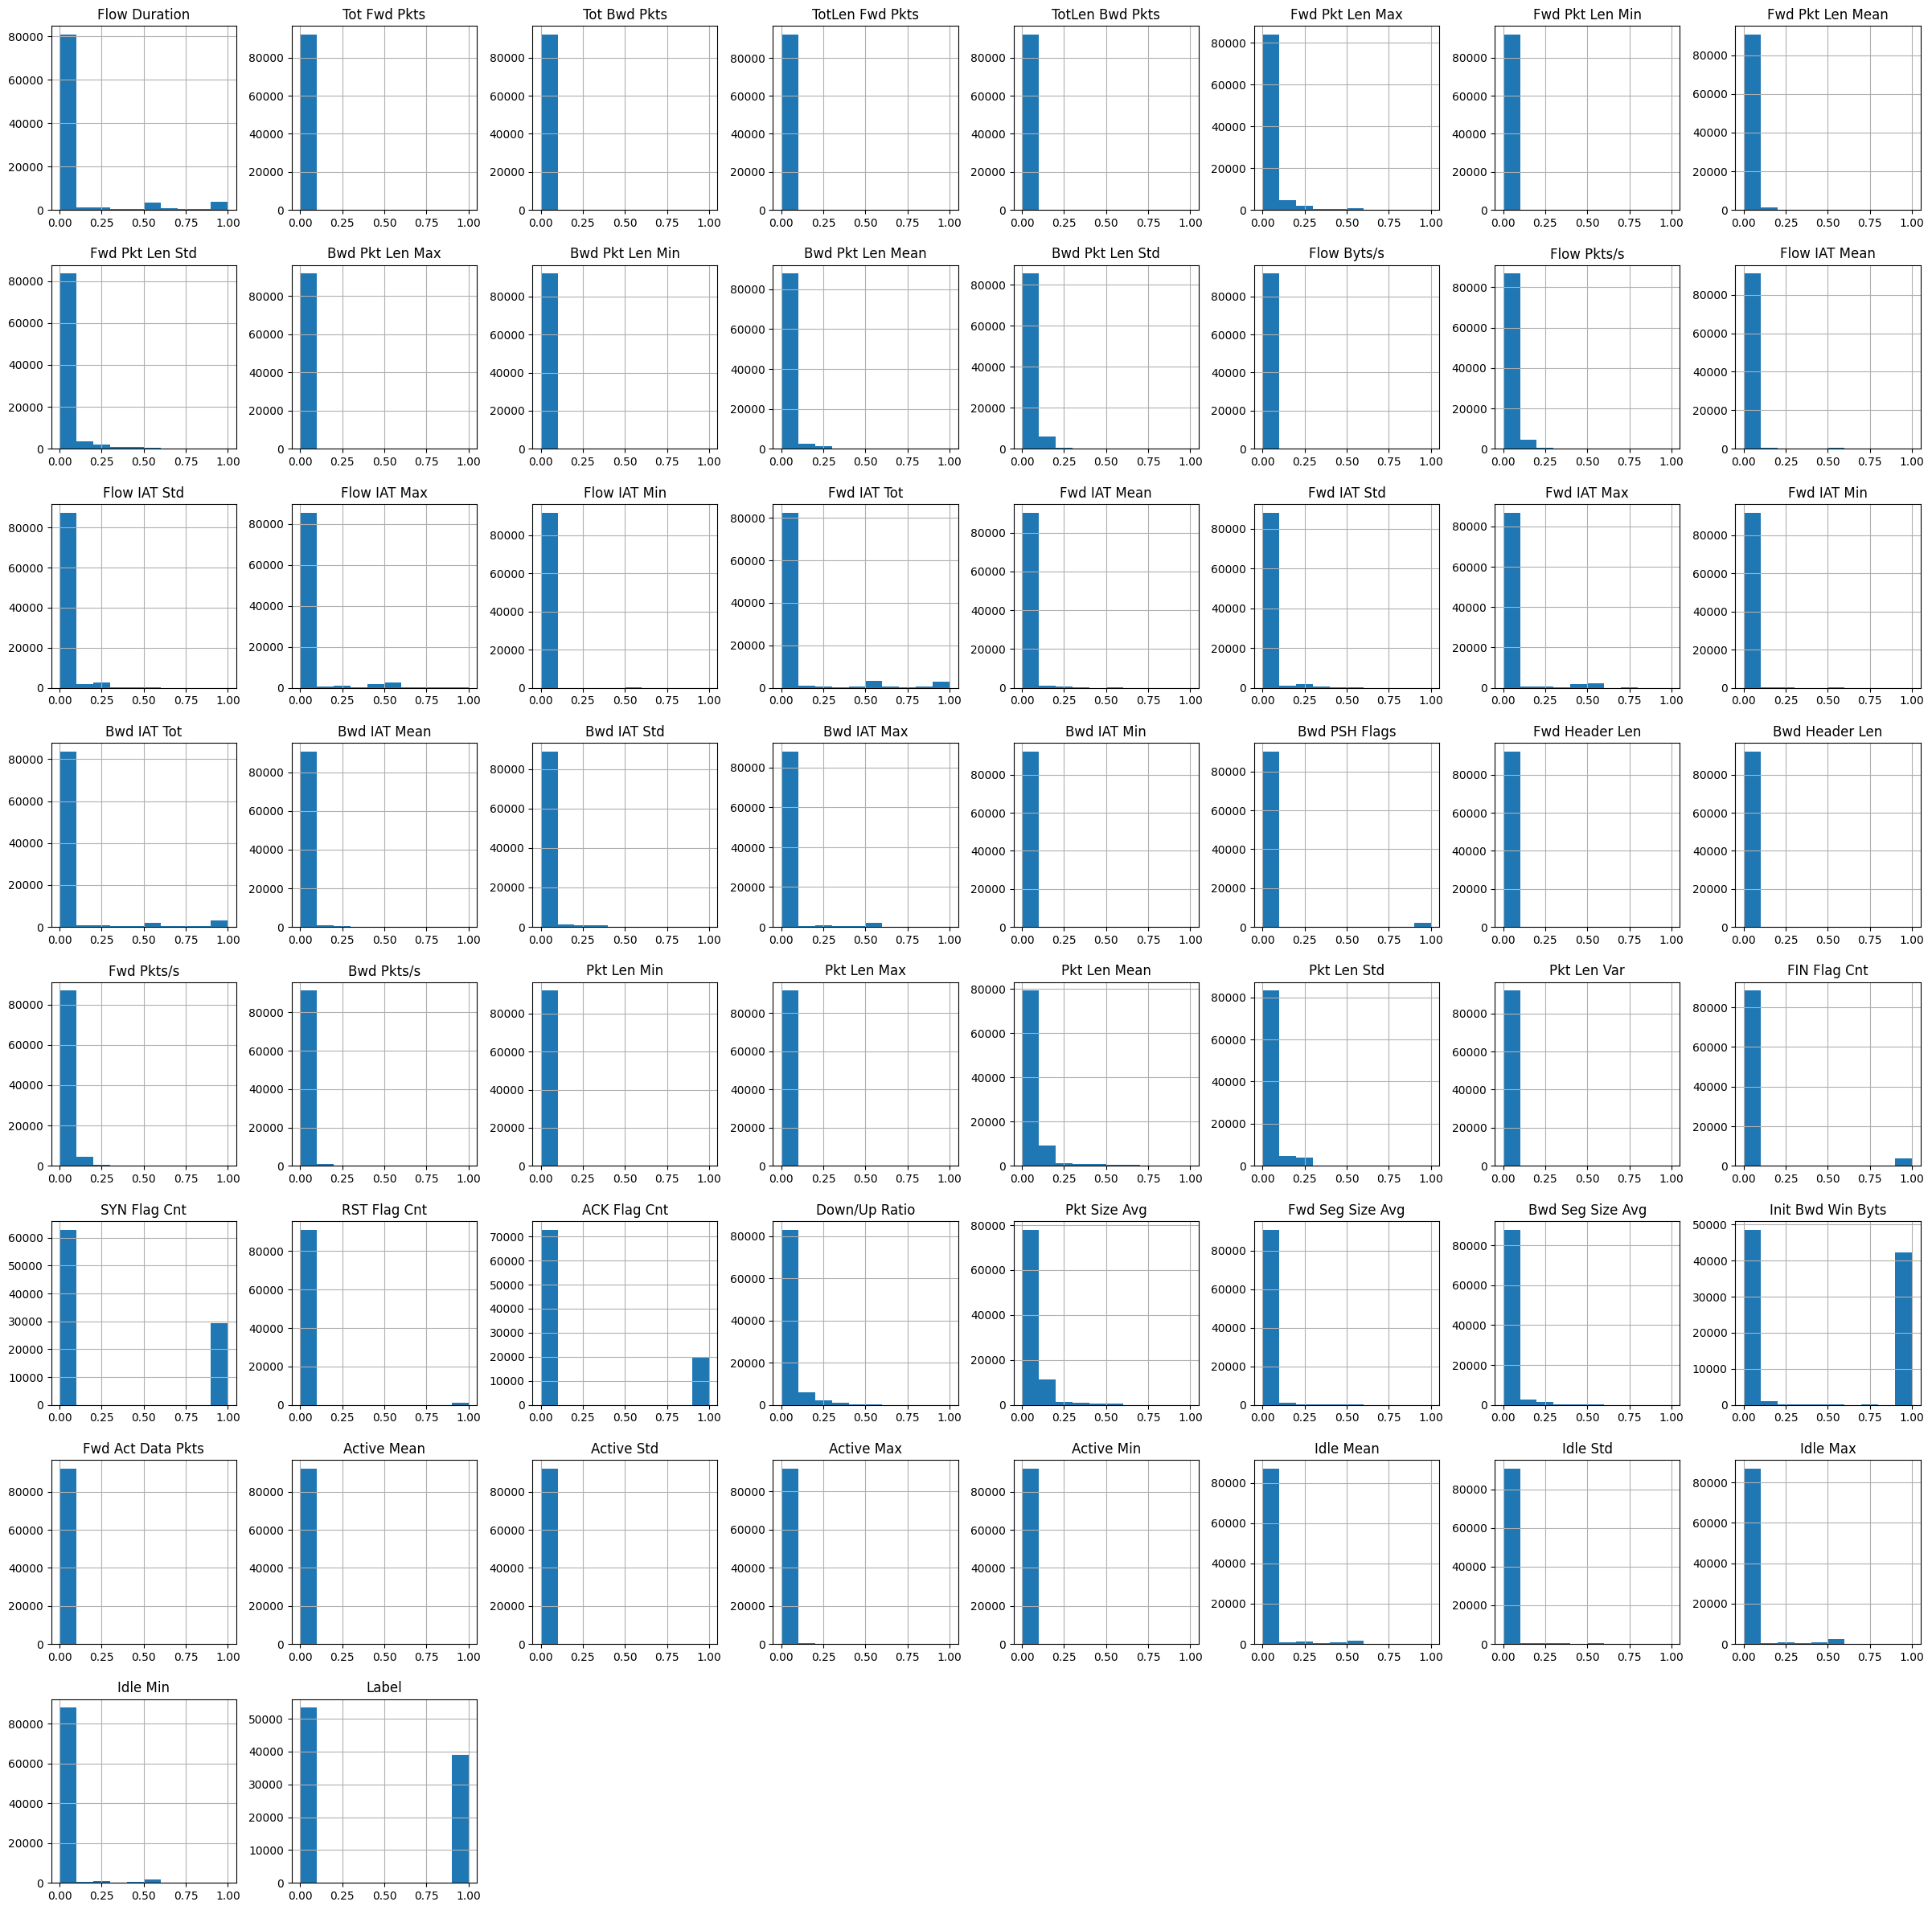

In [17]:
df.hist(figsize=(30,30));

### Attributes selection

In [18]:
# Calcola le correlazioni tra le features e la target_variable
df_to_corr = df
corr = df_to_corr.drop(columns=['Label']).corrwith(df_to_corr['Label'])

# Seleziona le features con una correlazione maggiore di una soglia scelta
threshold = 0.12 # Puoi scegliere una soglia a piacere
important_features = corr[corr > threshold].keys()

print(f'Most important features: {important_features.tolist()}')
print(f'Threshold: {threshold}')


Most important features: ['Fwd Pkt Len Min', 'Flow Pkts/s', 'Fwd Pkts/s', 'Bwd Pkts/s', 'FIN Flag Cnt', 'SYN Flag Cnt', 'Init Bwd Win Byts', 'Active Mean', 'Active Max', 'Active Min']
Threshold: 0.12


In [19]:
# Divide in input features and target variable

X = df.drop('Label', axis=1)
y = df['Label']

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Print feature importance scores
importance_scores = clf.feature_importances_

# Create a dataframe with feature names and scores
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importance_scores})

# Sort the dataframe by feature importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the names of the top n most important features
n = 10
top_n_features = feature_importances['feature'][:n]
print(f'Top {n} most important features: {top_n_features.tolist()}')

Top 10 most important features: ['Init Bwd Win Byts', 'Flow IAT Min', 'Bwd Header Len', 'Bwd IAT Min', 'Pkt Size Avg', 'Down/Up Ratio', 'Pkt Len Mean', 'Pkt Len Var', 'Bwd IAT Max', 'Flow IAT Std']


In [20]:
# Inizializzare la SVD
svd = TruncatedSVD(n_components=10)

df_to_svd= df.drop('Label', axis=1)

# Eseguire la riduzione delle dimensioni delle features
df_svd = svd.fit_transform(df_to_svd)

feature_names = list(df_to_svd.columns)

# Stampare i nomi delle dieci features più importanti
print("Le dieci features più importanti sono:")
for i in range(10):
    feature_index = svd.components_[i].argmax()
    print("- {}".format(feature_names[feature_index]))

Le dieci features più importanti sono:
- Init Bwd Win Byts
- ACK Flag Cnt
- Flow Duration
- FIN Flag Cnt
- FIN Flag Cnt
- Pkt Len Mean
- RST Flag Cnt
- Idle Min
- Bwd IAT Tot
- Fwd Pkt Len Std


Le 10 features più importanti sono:
Fwd Act Data Pkts
TotLen Fwd Pkts
Tot Fwd Pkts
TotLen Bwd Pkts
Fwd Header Len
Bwd IAT Min
Tot Bwd Pkts
Bwd Header Len
Fwd IAT Min
Flow Byts/s


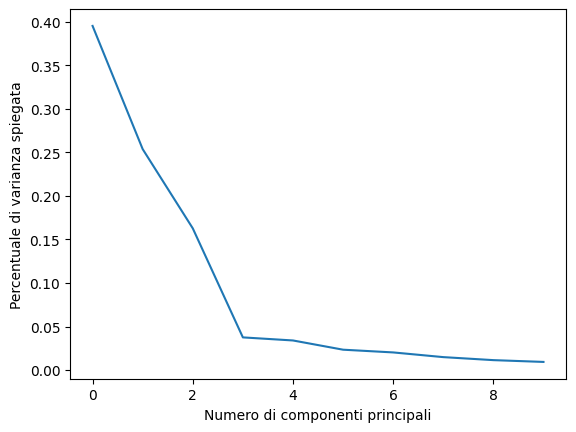

In [21]:
# Creazione di un oggetto PCA
df_pca = df.drop('Label', axis=1)
pca = PCA(n_components=10)
pca.fit(df_pca)

# Estrazione delle caratteristiche selezionate
X_pca = pca.transform(df_pca)
# Calcola le feature importati dalla PCA
feature_importance = np.abs(pca.components_[0])

# Ordina le feature in base all'importanza
sorted_idx = np.argsort(feature_importance)

# Stampa le 10 features più importanti
print("Le 10 features più importanti sono:")
for i in range(10):
    print(df_pca.columns[sorted_idx[i]])

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Numero di componenti principali')
plt.ylabel('Percentuale di varianza spiegata')
plt.show()

In [22]:
X_hs = df.drop("Label", axis=1)
y_hs = df["Label"]
X_hs_train, X_hs_test, y_hs_train, y_hs_test = train_test_split(X_hs, y_hs, test_size=0.2, random_state=42)

# Addestriamo un albero decisionale ExtraTreesClassifier sui dati di addestramento
model = ExtraTreesClassifier()
model.fit(X_hs_train, y_hs_train)

# Valutiamo l'importanza delle feature
importances = model.feature_importances_

# Creiamo una lista di tuple con le feature e le loro importanze
feature_importances = [(feature, importance) for feature, importance in zip(X_hs_train.columns, importances)]

# Ordiniamo la lista in base all'importanza delle feature
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Stampa le 20 feature più importanti
for feature, importance in feature_importances[:20]:
    print(feature, importance)

SYN Flag Cnt 0.10392253333427473
Init Bwd Win Byts 0.07688299207653299
Down/Up Ratio 0.05450445964926207
Fwd Pkts/s 0.03706950450073117
Flow Pkts/s 0.03233861504307022
FIN Flag Cnt 0.0279352271572341
ACK Flag Cnt 0.02707759416490238
Fwd Seg Size Avg 0.026917840165246107
Fwd Pkt Len Max 0.025305581122446207
Fwd Pkt Len Min 0.02474860872778966
Pkt Len Mean 0.023761995420916653
Pkt Size Avg 0.0228502245669582
Tot Bwd Pkts 0.022303286961274104
Bwd Header Len 0.022263727324729986
Bwd Pkts/s 0.021401741374572944
Bwd Pkt Len Min 0.021274584760104433
Flow Duration 0.02116102810890768
Bwd IAT Tot 0.020475846295655846
Pkt Len Min 0.019846442286884536
Fwd IAT Tot 0.019069068537803834


## Splitting dataset

In [23]:
# split the dataset into train and test sets
train_x, test_x, train_y, test_y = train_test_split(df.drop("Label", axis=1), df["Label"], test_size=0.3, random_state=42)

In [24]:
train_x.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,6.454800e+04,64548.000000,64548.000000,64548.000000,6.454800e+04,64548.000000,64548.000000,64548.000000,64548.000000,6.454800e+04,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,6.454800e+04,6.454800e+04,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000,64548.000000
mean,0.090118,0.000703,0.000552,0.000259,0.000325,0.026644,0.002755,0.009418,0.029784,0.011682,0.015268,0.024864,0.025896,0.001213,1.336532e-02,0.010313,0.020750,0.044871,3.325467e-03,0.079531,0.012501,0.019805,0.038286,3.414103e-03,0.064152,0.007242,0.014075,0.026490,0.000919,0.021333,0.000521,0.000518,1.324273e-02,6.743962e-03,0.014961,0.012392,0.051976,0.034789,0.005622,0.040760,0.318585,0.011573,0.209937,0.038566,0.052750,0.009418,0.024864,0.458070,0.000392,0.004010,0.001300,0.005172,0.003555,0.032775,0.006499,0.036405,0.029499
std,0.227126,0.015597,0.008244,0.012525,0.006194,0.078217,0.013637,0.031744,0.096302,0.026032,0.025770,0.048969,0.051689,0.018559,4.739850e-02,0.042676,0.058806,0.121405,3.809022e-02,0.213345,0.043201,0.062517,0.111679,3.400728e-02,0.208519,0.031795,0.061712,0.100437,0.014873,0.144493,0.011804,0.008163,4.720754e-02,2.402763e-02,0.021914,0.026520,0.088325,0.066420,0.022628,0.197736,0.465931,0.106953,0.407266,0.065928,0.076817,0.031744,0.048969,0.489379,0.013285,0.013703,0.011545,0.018022,0.012836,0.099727,0.050581,0.111176,0.094901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.513170e-10,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.560653e-07,0.000166,0.000000,0.000180,3.389837e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000036,0.000000e+00,3.767027e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000583,0.000066,0.000046,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.003688,0.000000,0.012919,0.005698,0.000003,1.745722e-05,0.000437,0.000000,0.000568,4.216110e-06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000233,0.000227,0.000000,0.000232,0.000009,0.000000,0.000057,0.000046,2.256567e-07,1.426137e-05,0.000000,0.003

In [25]:
test_x.describe()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,2.766400e+04,27664.000000,2.766400e+04,27664.000000,2.766400e+04,27664.000000,27664.000000,27664.000000,27664.000000,2.766400e+04,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,2.766400e+04,2.766400e+04,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000,27664.000000
mean,0.087163,0.000771,0.000531,0.000235,0.000340,0.026504,0.002803,0.009386,0.029985,0.011707,0.015285,0.024938,0.025886,0.001205,1.295841e-02,0.010543,2.092176e-02,0.044461,3.442453e-03,0.075568,0.012110,0.019001,0.036709,3.385446e-03,0.061541,0.007403,0.014413,0.026065,0.000861,0.021147,0.000465,0.000498,1.277604e-02,6.570393e-03,0.015074,0.012441,0.051763,0.034727,0.005663,0.043414,0.315934,0.012507,0.212984,0.038234,0.052559,0.009386,0.024938,0.456562,0.000359,0.004046,0.001340,0.005177,0.003577,0.032691,0.006088,0.036065,0.029632
std,0.222226,0.018338,0.009315,0.013535,0.007945,0.077302,0.013771,0.030388,0.096559,0.027270,0.025154,0.049476,0.052372,0.017708,4.787927e-02,0.044910,6.087735e-02,0.121616,4.003751e-02,0.207015,0.042481,0.060544,0.108573,3.378210e-02,0.203657,0.032995,0.064566,0.100308,0.013678,0.143876,0.009106,0.009291,4.720345e-02,2.499036e-02,0.023321,0.027736,0.087216,0.066762,0.024100,0.203790,0.464895,0.111136,0.409424,0.066500,0.075962,0.030388,0.049476,0.489152,0.013963,0.014716,0.013318,0.019015,0.013654,0.100953,0.048617,0.111477,0.096446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,9.322052e-08,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000e-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.945180e-07,0.000166,0.000000e+00,0.000181,3.389837e-07,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000036,0.000000e+00,4.028486e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000589,0.000066,0.000046,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.003688,0.000000,0.012890,0.005698,0.000003,1.724647e-05,0.000437,3.635722e-07,0.000565,3.974584e-06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000234,0.000228,0.000000,0.000233,0.000008,0.000000,0.000057,0.000046,2.305358e-07,1.42063

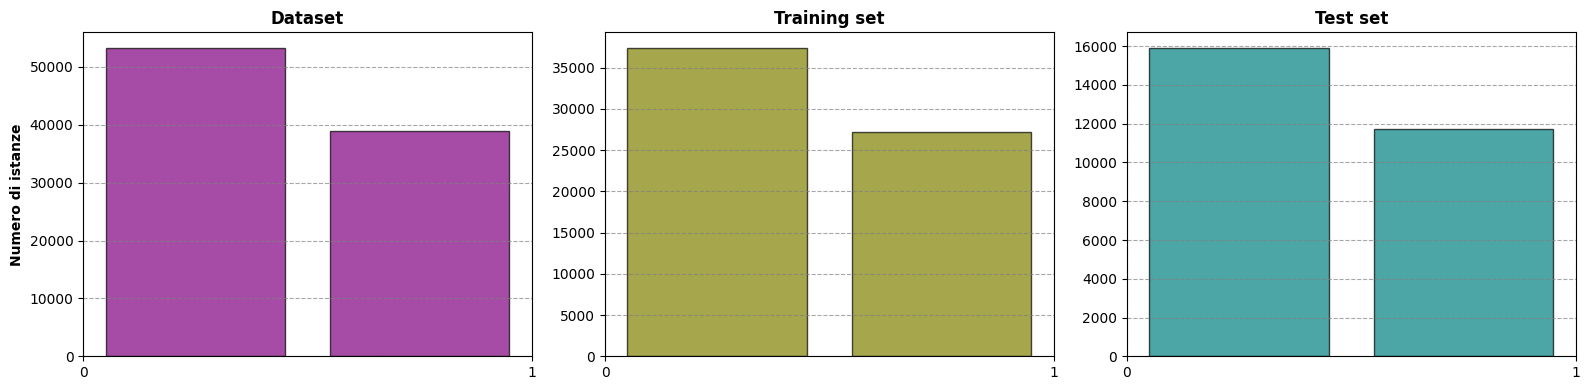

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

ax[0].hist(df['Label'], bins=[0, 0.5, 1], color='purple', rwidth=0.8, alpha=0.7, edgecolor='k')
ax[0].set_title('Dataset', fontsize=12, fontweight='bold')
ax[0].set_xticks(np.arange(0, 2, 1))
ax[0].set_ylabel('Numero di istanze', fontsize=10, fontweight='bold')
ax[0].grid(True, linestyle='--', color='gray', alpha=0.7)

ax[1].hist(train_y, bins=[0, 0.5, 1], color='olive', rwidth=0.8, alpha=0.7, edgecolor='k')
ax[1].set_title('Training set', fontsize=12, fontweight='bold')
ax[1].set_xticks(np.arange(0, 2, 1))
ax[1].grid(True, linestyle='--', color='gray', alpha=0.7)

ax[2].hist(test_y, bins=[0, 0.5, 1], color='teal', rwidth=0.8, alpha=0.7, edgecolor='k')
ax[2].set_title('Test set', fontsize=12, fontweight='bold')
ax[2].set_xticks(np.arange(0, 2, 1))
ax[2].grid(True, linestyle='--', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()

## Classification 

### Decision Tree Classifier

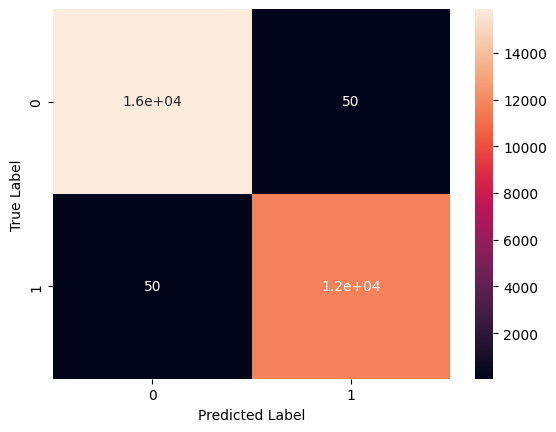

+-----------+---------+
|   Metric  |  Value  |
+-----------+---------+
|           |         |
|  Accuracy | 0.99639 |
|           |         |
| Precision | 0.99574 |
|           |         |
|   Recall  | 0.99574 |
|           |         |
|  F1-score | 0.99574 |
|           |         |
+-----------+---------+


In [27]:
# Crea un oggetto albero di decisione
dt = tree.DecisionTreeClassifier()

# Addestra il modello sui dati di training
dt = dt.fit(train_x, train_y)

# Utilizza il modello per prevedere le etichette sui dati di test
predictions_dt = dt.predict(test_x)

# Calcola la matrice di confusione del modello
cm_dt = metrics.confusion_matrix(test_y, predictions_dt)

# Crea una vista della matrice di confusione
sns.heatmap(cm_dt, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_dt = metrics.accuracy_score(test_y, predictions_dt)
precision_dt = metrics.precision_score(test_y, predictions_dt)
recall_dt = metrics.recall_score(test_y, predictions_dt)
f1_score_dt = metrics.f1_score(test_y, predictions_dt)

table_dt = PrettyTable()
table_dt.field_names = ["Metric", "Value"]
table_dt.add_row(['',''])
table_dt.add_row(["Accuracy", round(accuracy_dt, 5)])
table_dt.add_row(['',''])
table_dt.add_row(["Precision", round(precision_dt, 5)])
table_dt.add_row(['',''])
table_dt.add_row(["Recall", round(recall_dt, 5)])
table_dt.add_row(['',''])
table_dt.add_row(["F1-score", round(f1_score_dt, 5)])
table_dt.add_row(['',''])

# Stampa la tabella delle statistiche del modello
print(table_dt)

### Random Forest Classifier

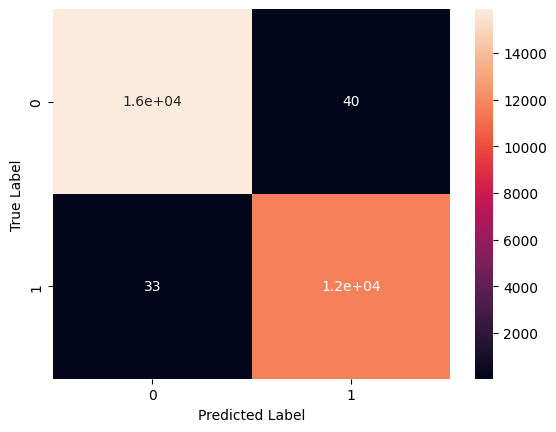

+-----------+---------+
|   Metric  |  Value  |
+-----------+---------+
|           |         |
|  Accuracy | 0.99736 |
|           |         |
| Precision |  0.9966 |
|           |         |
|   Recall  | 0.99719 |
|           |         |
|  F1-score | 0.99689 |
|           |         |
+-----------+---------+


In [28]:
# Crea un modello di Random Forest
rfc = RandomForestClassifier()

# Addestra il modello con i dati di training
rfc = rfc.fit(train_x, train_y)

# Effettua le predizioni sul test set
predictions_rfc = rfc.predict(test_x)

# Calcola la matrice di confusione del modello
cm_rfc = metrics.confusion_matrix(test_y, predictions_rfc)

# Crea una vista della matrice di confusione
sns.heatmap(cm_rfc, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_rfc = metrics.accuracy_score(test_y, predictions_rfc)
precision_rfc = metrics.precision_score(test_y, predictions_rfc)
recall_rfc = metrics.recall_score(test_y, predictions_rfc)
f1_score_rfc = metrics.f1_score(test_y, predictions_rfc)

# Crea una tabella per le statistiche del modello
table_rfc = PrettyTable()
table_rfc.field_names = ["Metric", "Value"]
table_rfc.add_row(['',''])
table_rfc.add_row(["Accuracy", round(accuracy_rfc, 5)])
table_rfc.add_row(['',''])
table_rfc.add_row(["Precision", round(precision_rfc, 5)])
table_rfc.add_row(['',''])
table_rfc.add_row(["Recall", round(recall_rfc, 5)])
table_rfc.add_row(['',''])
table_rfc.add_row(["F1-score", round(f1_score_rfc, 5)])
table_rfc.add_row(['',''])

# Stampa la tabella delle statistiche del modello
print(table_rfc)

### K-Neighbors Classifier

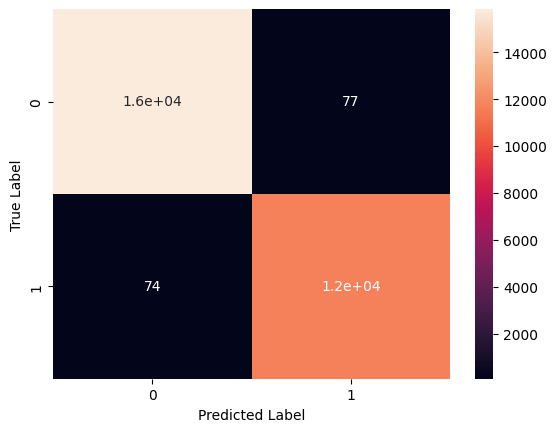

+-----------+---------+
|   Metric  |  Value  |
+-----------+---------+
|           |         |
|  Accuracy | 0.99454 |
|           |         |
| Precision | 0.99345 |
|           |         |
|   Recall  |  0.9937 |
|           |         |
|  F1-score | 0.99357 |
|           |         |
+-----------+---------+


In [29]:
# Crea un modello di KNN
knn = KNeighborsClassifier()

# Addestra il modello con i dati di training
knn = knn.fit(train_x, train_y)

# Effettua le predizioni sul test set
predictions_knn = knn.predict(test_x)

# Calcola la matrice di confusione del modello
cm_knn = metrics.confusion_matrix(test_y, predictions_knn)

# Crea una vista della matrice di confusione
sns.heatmap(cm_knn, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_knn = metrics.accuracy_score(test_y, predictions_knn)
precision_knn = metrics.precision_score(test_y, predictions_knn)
recall_knn = metrics.recall_score(test_y, predictions_knn)
f1_score_knn = metrics.f1_score(test_y, predictions_knn)

# Crea una tabella per le statistiche del modello
table_knn = PrettyTable()
table_knn.field_names = ["Metric", "Value"]
table_knn.add_row(['',''])
table_knn.add_row(["Accuracy", round(accuracy_knn, 5)])
table_knn.add_row(['',''])
table_knn.add_row(["Precision", round(precision_knn, 5)])
table_knn.add_row(['',''])
table_knn.add_row(["Recall", round(recall_knn, 5)])
table_knn.add_row(['',''])
table_knn.add_row(["F1-score", round(f1_score_knn, 5)])
table_knn.add_row(['',''])

# Stampa la tabella delle statistiche del modello
print(table_knn)

### SVM Classifier

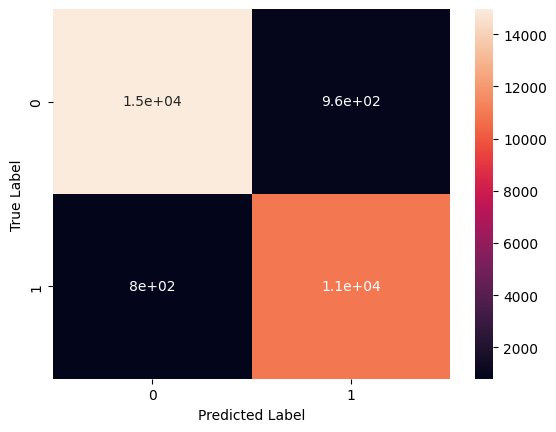

+-----------+---------+
|   Metric  |  Value  |
+-----------+---------+
|           |         |
|  Accuracy | 0.93645 |
|           |         |
| Precision | 0.91965 |
|           |         |
|   Recall  | 0.93171 |
|           |         |
|  F1-score | 0.92564 |
|           |         |
+-----------+---------+


In [30]:
svc = svm.SVC()
svc = svc.fit(train_x, train_y)

predictions_svm = svc.predict(test_x)

cm_svm = metrics.confusion_matrix(test_y, predictions_svm)

sns.heatmap(cm_svm, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_svm = metrics.accuracy_score(test_y, predictions_svm)
precision_svm = metrics.precision_score(test_y, predictions_svm)
recall_svm = metrics.recall_score(test_y, predictions_svm)
f1_score_svm = metrics.f1_score(test_y, predictions_svm)

# Crea una tabella per le statistiche del modello
table_svm = PrettyTable()
table_svm.field_names = ["Metric", "Value"]
table_svm.add_row(['',''])
table_svm.add_row(["Accuracy", round(accuracy_svm, 5)])
table_svm.add_row(['',''])
table_svm.add_row(["Precision", round(precision_svm, 5)])
table_svm.add_row(['',''])
table_svm.add_row(["Recall", round(recall_svm, 5)])
table_svm.add_row(['',''])
table_svm.add_row(["F1-score", round(f1_score_svm, 5)])
table_svm.add_row(['',''])

# Stampa la tabella delle statistiche del modello
print(table_svm)

### Naive Bayesian Classifier

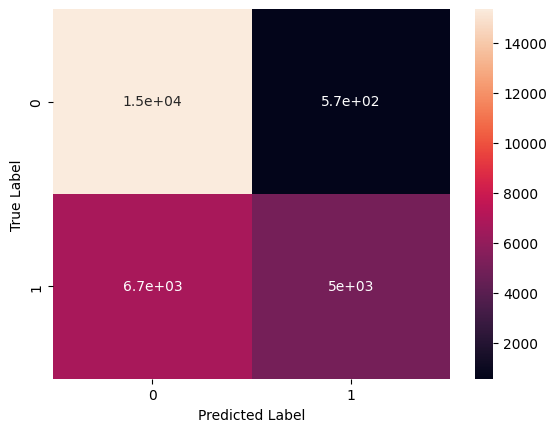

+-----------+---------+
|   Metric  |  Value  |
+-----------+---------+
|           |         |
|  Accuracy | 0.73547 |
|           |         |
| Precision | 0.89716 |
|           |         |
|   Recall  | 0.42566 |
|           |         |
|  F1-score | 0.57739 |
|           |         |
+-----------+---------+


In [31]:
nbc = GaussianNB()
nbc = nbc.fit(train_x, train_y)

predictions_nbc = nbc.predict(test_x)

cm_nbc = metrics.confusion_matrix(test_y, predictions_nbc)

sns.heatmap(cm_nbc, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_nbc = metrics.accuracy_score(test_y, predictions_nbc)
precision_nbc = metrics.precision_score(test_y, predictions_nbc)
recall_nbc = metrics.recall_score(test_y, predictions_nbc)
f1_score_nbc = metrics.f1_score(test_y, predictions_nbc)

# Crea una tabella per le statistiche del modello
table_nbc = PrettyTable()
table_nbc.field_names = ["Metric", "Value"]
table_nbc.add_row(['',''])
table_nbc.add_row(["Accuracy", round(accuracy_nbc, 5)])
table_nbc.add_row(['',''])
table_nbc.add_row(["Precision", round(precision_nbc, 5)])
table_nbc.add_row(['',''])
table_nbc.add_row(["Recall", round(recall_nbc, 5)])
table_nbc.add_row(['',''])
table_nbc.add_row(["F1-score", round(f1_score_nbc, 5)])
table_nbc.add_row(['',''])

# Stampa la tabella delle statistiche del modello
print(table_nbc)


### Stochastic Gradient Descent Classifier

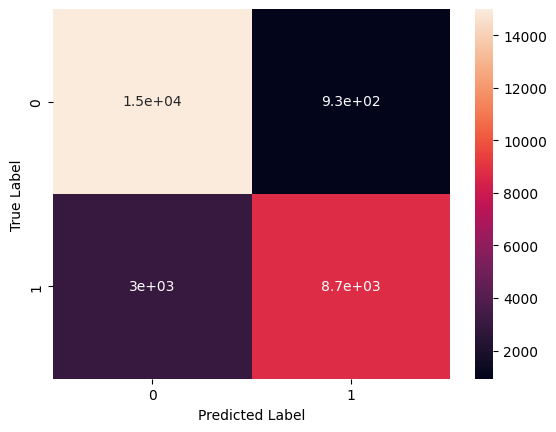

+-----------+---------+
|   Metric  |  Value  |
+-----------+---------+
|           |         |
|  Accuracy | 0.85758 |
|           |         |
| Precision | 0.90377 |
|           |         |
|   Recall  |  0.7437 |
|           |         |
|  F1-score | 0.81596 |
|           |         |
+-----------+---------+


In [32]:
# Crea un modello di SGD
sgd = SGDClassifier()

# Addestra il modello con i dati di training
sgd = sgd.fit(train_x, train_y)

# Effettua le predizioni sul test set
predictions_sgd = sgd.predict(test_x)

# Calcola la matrice di confusione del modello
cm_sgd = metrics.confusion_matrix(test_y, predictions_sgd)

# Crea una vista della matrice di confusione
sns.heatmap(cm_sgd, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_sgd = metrics.accuracy_score(test_y, predictions_sgd)
precision_sgd = metrics.precision_score(test_y, predictions_sgd)
recall_sgd = metrics.recall_score(test_y, predictions_sgd)
f1_score_sgd = metrics.f1_score(test_y, predictions_sgd)

# Crea una tabella per le statistiche del modello
table_sgd = PrettyTable()
table_sgd.field_names = ["Metric", "Value"]
table_sgd.add_row(['',''])
table_sgd.add_row(["Accuracy", round(accuracy_sgd, 5)])
table_sgd.add_row(['',''])
table_sgd.add_row(["Precision", round(precision_sgd, 5)])
table_sgd.add_row(['',''])
table_sgd.add_row(["Recall", round(recall_sgd, 5)])
table_sgd.add_row(['',''])
table_sgd.add_row(["F1-score", round(f1_score_sgd, 5)])
table_sgd.add_row(['',''])

# Stampa la tabella delle statistiche del modello
print(table_sgd)

### Gradient Boosting Classifier

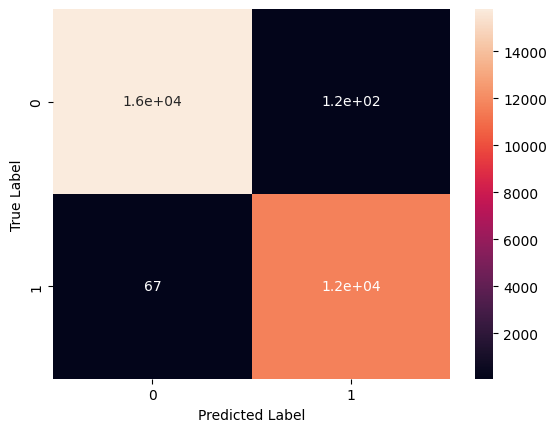

+-----------+---------+
|   Metric  |  Value  |
+-----------+---------+
|           |         |
|  Accuracy | 0.99324 |
|           |         |
| Precision | 0.98983 |
|           |         |
|   Recall  | 0.99429 |
|           |         |
|  F1-score | 0.99206 |
|           |         |
+-----------+---------+


In [33]:
# Crea un modello di Gradient Boosting
gbc = GradientBoostingClassifier()

# Addestra il modello con i dati di training
gbc = gbc.fit(train_x, train_y)

# Effettua le predizioni sul test set
predictions_gbc = gbc.predict(test_x)

# Calcola la matrice di confusione del modello
cm_gbc = metrics.confusion_matrix(test_y, predictions_gbc)

# Crea una vista della matrice di confusione
sns.heatmap(cm_gbc, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy_gbc = metrics.accuracy_score(test_y, predictions_gbc)
precision_gbc = metrics.precision_score(test_y, predictions_gbc)
recall_gbc = metrics.recall_score(test_y, predictions_gbc)
f1_score_gbc = metrics.f1_score(test_y, predictions_gbc)

# Crea una tabella per le statistiche del modello
table_gbc = PrettyTable()
table_gbc.field_names = ["Metric", "Value"]
table_gbc.add_row(['',''])
table_gbc.add_row(["Accuracy", round(accuracy_gbc, 5)])
table_gbc.add_row(['',''])
table_gbc.add_row(["Precision", round(precision_gbc, 5)])
table_gbc.add_row(['',''])
table_gbc.add_row(["Recall", round(recall_gbc, 5)])
table_gbc.add_row(['',''])
table_gbc.add_row(["F1-score", round(f1_score_gbc, 5)])
table_gbc.add_row(['',''])

# Stampa la tabella delle statistiche del modello
print(table_gbc)

### Comparison between classifiers

In [34]:
classifiers = ['Decision Tree Classifier', 'Random Forest Classifier', 'K-Neighbors Classifier', 'SVC', 'Naive Bayesian Classifier', 'SGD Classifier', 'Gradient Boosting Classifier']
accuracies = [accuracy_dt, accuracy_rfc, accuracy_knn, accuracy_svm, accuracy_nbc, accuracy_sgd, accuracy_gbc]
precisions = [precision_dt, precision_rfc, precision_knn, precision_svm, precision_nbc, precision_sgd, precision_gbc]
recalls = [recall_dt, recall_rfc, recall_knn, recall_svm, recall_nbc, recall_sgd, recall_gbc]
f1_scores = [f1_score_dt, f1_score_rfc, f1_score_knn, f1_score_svm, f1_score_nbc, f1_score_sgd, f1_score_gbc]

table = PrettyTable()
table.field_names = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
table.add_row(['', '', '', '', ''])

colored_rows = []
for i in range(len(classifiers)):
    accuracy = str(round(accuracies[i]*100, 5))
    precision = str(round(precisions[i]*100, 5))
    recall = str(round(recalls[i]*100, 5))
    f1 = str(round(f1_scores[i]*100, 5))

    colored_rows.append(classifiers[i])
    if float(accuracy) >= 95:
        colored_rows.append(colored(accuracy + "%", "green", attrs=['bold']))
    elif float(accuracy) >= 90:
        colored_rows.append(colored(accuracy + "%", "light_green"))
    elif float(accuracy) >= 60:
        colored_rows.append(colored(accuracy + "%", "yellow"))
    else:
        colored_rows.append(colored(accuracy + "%", "red"))

    if float(precision) >= 95:
        colored_rows.append(colored(precision + "%", "green", attrs=['bold']))
    elif float(precision) >= 90:
        colored_rows.append(colored(precision + "%", "light_green"))
    elif float(precision) >= 60:
        colored_rows.append(colored(precision + "%", "yellow"))
    else:
        colored_rows.append(colored(precision + "%", "red"))
    
    if float(recall) >= 95:
        colored_rows.append(colored(recall + "%", "green", attrs=['bold']))
    elif float(recall) >= 90:
        colored_rows.append(colored(recall + "%", "light_green"))
    elif float(recall) >= 60:
        colored_rows.append(colored(recall + "%", "yellow"))
    else:
        colored_rows.append(colored(recall + "%", "red"))

    if float(f1) >= 95:
        colored_rows.append(colored(f1 + "%", "green", attrs=['bold']))
    elif float(f1) >= 90:
        colored_rows.append(colored(f1 + "%", "light_green"))
    elif float(f1) >= 60:
        colored_rows.append(colored(f1 + "%", "yellow"))
    else:
        colored_rows.append(colored(f1 + "%", "red"))

    table.add_row(colored_rows)
    table.add_row(['', '', '', '', ''])
    colored_rows = []

print(table)

+------------------------------+-----------+-----------+-----------+-----------+
|          Classifier          |  Accuracy | Precision |   Recall  |  F1 Score |
+------------------------------+-----------+-----------+-----------+-----------+
|                              |           |           |           |           |
|   Decision Tree Classifier   | 99.63852% | 99.57425% | 99.57425% | 99.57425% |
|                              |           |           |           |           |
|   Random Forest Classifier   | 99.73612% |  99.6596% | 99.71901% |  99.6893% |
|                              |           |           |           |           |
|    K-Neighbors Classifier    | 99.45416% | 99.34451% | 99.36989% |  99.3572% |
|                              |           |           |           |           |
|             SVC              | 93.64517% | 91.96504% | 93.17098% | 92.56408% |
|                              |           |           |           |           |
|  Naive Bayesian Classifier

## Cross-Validation

In [35]:
X = df.drop("Label", axis=1)
y = df["Label"]

scoring = ['accuracy', 'precision', 'recall', 'f1']

### Decision Tree

In [36]:
scores_dt = cross_validate(dt, X, y, scoring=scoring, cv=10)

avg_acc_dt = scores_dt['test_accuracy'].mean()
avg_prec_dt = scores_dt['test_precision'].mean()
avg_recall_dt = scores_dt['test_recall'].mean()
avg_f1_dt = scores_dt['test_f1'].mean()
print("Cross-Validation Results:")
print(f"Accuracy Mean: {avg_acc_dt:.5f}")
print(f"Precision Mean: {avg_prec_dt:.5f}")
print(f"Recall Mean: {avg_recall_dt:.5f}")
print(f"F1 Score Mean: {avg_f1_dt:.5f}")

Cross-Validation Results:
Accuracy Mean: 0.99643
Precision Mean: 0.99591
Recall Mean: 0.99563
F1 Score Mean: 0.99577


### Random Forest

In [37]:
scores_rfc = cross_validate(rfc, X, y, scoring=scoring, cv=10)

avg_acc_rfc = scores_rfc['test_accuracy'].mean()
avg_prec_rfc = scores_rfc['test_precision'].mean()
avg_recall_rfc = scores_rfc['test_recall'].mean()
avg_f1_rfc = scores_rfc['test_f1'].mean()
print("Cross-Validation Results:")
print(f"Accuracy Mean: {avg_acc_rfc:.5f}")
print(f"Precision Mean: {avg_prec_rfc:.5f}")
print(f"Recall Mean: {avg_recall_rfc:.5f}")
print(f"F1 Score Mean: {avg_f1_rfc:.5f}")

Cross-Validation Results:
Accuracy Mean: 0.99763
Precision Mean: 0.99699
Recall Mean: 0.99738
F1 Score Mean: 0.99719


### K-Neighbors

In [38]:
scores_knn = cross_validate(knn, X, y, scoring=scoring, cv=10)

avg_acc_knn = scores_knn['test_accuracy'].mean()
avg_prec_knn = scores_knn['test_precision'].mean()
avg_recall_knn = scores_knn['test_recall'].mean()
avg_f1_knn = scores_knn['test_f1'].mean()
print("Cross-Validation Results:")
print(f"Accuracy Mean: {avg_acc_knn:.5f}")
print(f"Precision Mean: {avg_prec_knn:.5f}")
print(f"Recall Mean: {avg_recall_knn:.5f}")
print(f"F1 Score Mean: {avg_f1_knn:.5f}")

Cross-Validation Results:
Accuracy Mean: 0.99528
Precision Mean: 0.99460
Recall Mean: 0.99422
F1 Score Mean: 0.99441


### SVC

In [39]:
scores_svc = cross_validate(svc, X, y, scoring=scoring, cv=10)

avg_acc_svc = scores_svc['test_accuracy'].mean()
avg_prec_svc = scores_svc['test_precision'].mean()
avg_recall_svc = scores_svc['test_recall'].mean()
avg_f1_svc = scores_svc['test_f1'].mean()
print("Cross-Validation Results:")
print(f"Accuracy Mean: {avg_acc_svc:.5f}")
print(f"Precision Mean: {avg_prec_svc:.5f}")
print(f"Recall Mean: {avg_recall_svc:.5f}")
print(f"F1 Score Mean: {avg_f1_svc:.5f}")

Cross-Validation Results:
Accuracy Mean: 0.93841
Precision Mean: 0.92068
Recall Mean: 0.93455
F1 Score Mean: 0.92755


### Naive Bayesian

In [40]:
scores_nbc = cross_validate(nbc, X, y, scoring=scoring, cv=10)

avg_acc_nbc = scores_nbc['test_accuracy'].mean()
avg_prec_nbc = scores_nbc['test_precision'].mean()
avg_recall_nbc = scores_nbc['test_recall'].mean()
avg_f1_nbc = scores_nbc['test_f1'].mean()
print("Cross-Validation Results:")
print(f"Accuracy Mean: {avg_acc_nbc:.5f}")
print(f"Precision Mean: {avg_prec_nbc:.5f}")
print(f"Recall Mean: {avg_recall_nbc:.5f}")
print(f"F1 Score Mean: {avg_f1_nbc:.5f}")

Cross-Validation Results:
Accuracy Mean: 0.73965
Precision Mean: 0.89683
Recall Mean: 0.43262
F1 Score Mean: 0.58363


### SGD

In [41]:
scores_sgd = cross_validate(sgd, X, y, scoring=scoring, cv=10)

avg_acc_sgd = scores_sgd['test_accuracy'].mean()
avg_prec_sgd = scores_sgd['test_precision'].mean()
avg_recall_sgd = scores_sgd['test_recall'].mean()
avg_f1_sgd = scores_sgd['test_f1'].mean()
print("Cross-Validation Results:")
print(f"Accuracy Mean: {avg_acc_sgd:.5f}")
print(f"Precision Mean: {avg_prec_sgd:.5f}")
print(f"Recall Mean: {avg_recall_sgd:.5f}")
print(f"F1 Score Mean: {avg_f1_sgd:.5f}")

Cross-Validation Results:
Accuracy Mean: 0.86094
Precision Mean: 0.90187
Recall Mean: 0.75225
F1 Score Mean: 0.82026


### Gradient Boosting

In [42]:
scores_gbc = cross_validate(gbc, X, y, scoring=scoring, cv=10)

avg_acc_gbc = scores_gbc['test_accuracy'].mean()
avg_prec_gbc = scores_gbc['test_precision'].mean()
avg_recall_gbc = scores_gbc['test_recall'].mean()
avg_f1_gbc = scores_gbc['test_f1'].mean()
print("Cross-Validation Results:")
print(f"Accuracy Mean: {avg_acc_gbc:.5f}")
print(f"Precision Mean: {avg_prec_gbc:.5f}")
print(f"Recall Mean: {avg_recall_gbc:.5f}")
print(f"F1 Score Mean: {avg_f1_gbc:.5f}")

Cross-Validation Results:
Accuracy Mean: 0.99319
Precision Mean: 0.99004
Recall Mean: 0.99386
F1 Score Mean: 0.99194


### Cross-Validation Comparison between Classifiers

In [44]:
classifiers = ['Decision Tree Classifier', 'Random Forest Classifier', 'K-Neighbors Classifier', 'SVC', 'Naive Bayesian Classifier', 'SGD Classifier', 'Gradient Boosting Classifier']
accuracies = [avg_acc_dt, avg_acc_rfc, avg_acc_knn, avg_acc_svc, avg_acc_nbc, avg_acc_sgd, avg_acc_gbc]
precisions = [avg_prec_dt, avg_prec_rfc, avg_prec_knn, avg_prec_svc, avg_prec_nbc, avg_prec_sgd, avg_prec_gbc]
recalls = [avg_recall_dt, avg_recall_rfc, avg_recall_knn, avg_recall_svc, avg_recall_nbc, avg_recall_sgd, avg_recall_gbc]
f1_scores = [avg_f1_dt, avg_f1_rfc, avg_f1_knn, avg_f1_nbc, avg_f1_nbc, avg_f1_sgd, avg_f1_gbc]

table = PrettyTable()
table.field_names = ['Classifier', 'AVG Accuracy', 'AVG Precision', 'AVG Recall', 'AVG F1 Score']
table.add_row(['', '', '', '', ''])

colored_rows = []
for i in range(len(classifiers)):

    accuracy = str(round(accuracies[i]*100, 5))
    precision = str(round(precisions[i]*100, 5))
    recall = str(round(recalls[i]*100, 5))
    f1 = str(round(f1_scores[i]*100, 5))

    colored_rows.append(classifiers[i])
    if float(accuracy) >= 95:
        colored_rows.append(colored(accuracy + "%", "green", attrs=['bold']))
    elif float(accuracy) >= 90:
        colored_rows.append(colored(accuracy + "%", "light_green"))
    elif float(accuracy) >= 60:
        colored_rows.append(colored(accuracy + "%", "yellow"))
    else:
        colored_rows.append(colored(accuracy + "%", "red"))

    if float(precision) >= 95:
        colored_rows.append(colored(precision + "%", "green", attrs=['bold']))
    elif float(precision) >= 90:
        colored_rows.append(colored(precision + "%", "light_green"))
    elif float(precision) >= 60:
        colored_rows.append(colored(precision + "%", "yellow"))
    else:
        colored_rows.append(colored(precision + "%", "red"))
    
    if float(recall) >= 95:
        colored_rows.append(colored(recall + "%", "green", attrs=['bold']))
    elif float(recall) >= 90:
        colored_rows.append(colored(recall + "%", "light_green"))
    elif float(recall) >= 60:
        colored_rows.append(colored(recall + "%", "yellow"))
    else:
        colored_rows.append(colored(recall + "%", "red"))

    if float(f1) >= 95:
        colored_rows.append(colored(f1 + "%", "green", attrs=['bold']))
    elif float(f1) >= 90:
        colored_rows.append(colored(f1 + "%", "light_green"))
    elif float(f1) >= 60:
        colored_rows.append(colored(f1 + "%", "yellow"))
    else:
        colored_rows.append(colored(f1 + "%", "red"))

    table.add_row(colored_rows)
    table.add_row(['', '', '', '', ''])
    colored_rows = []

print(table)

+------------------------------+--------------+---------------+------------+--------------+
|          Classifier          | AVG Accuracy | AVG Precision | AVG Recall | AVG F1 Score |
+------------------------------+--------------+---------------+------------+--------------+
|                              |              |               |            |              |
|   Decision Tree Classifier   |  99.64321%   |   99.59123%   | 99.56296%  |  99.57706%   |
|                              |              |               |            |              |
|   Random Forest Classifier   |   99.7625%   |   99.69935%   | 99.73778%  |  99.71854%   |
|                              |              |               |            |              |
|    K-Neighbors Classifier    |  99.52826%   |   99.46005%   | 99.42157%  |  99.44073%   |
|                              |              |               |            |              |
|             SVC              |  93.84138%   |   92.06792%   | 93.45468%  |  58